In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("data/dataset.csv")
data_bckup=data.copy()

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data.shape

(303, 14)

In [8]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

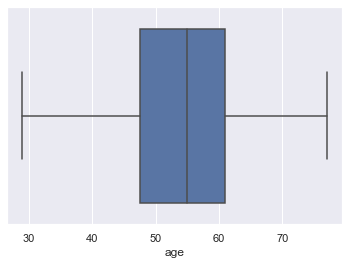

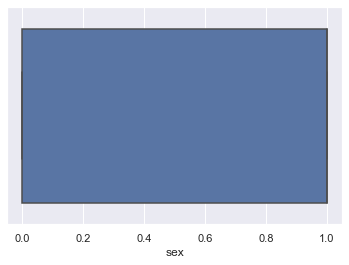

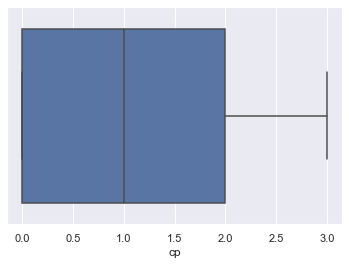

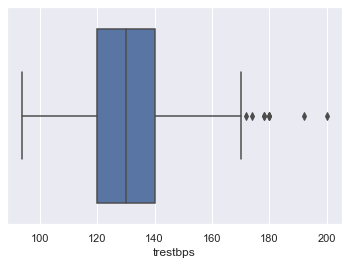

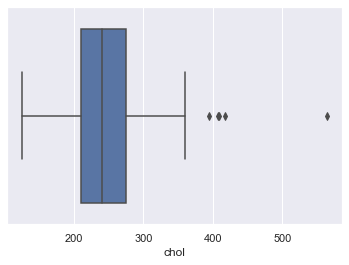

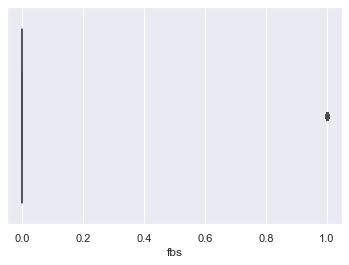

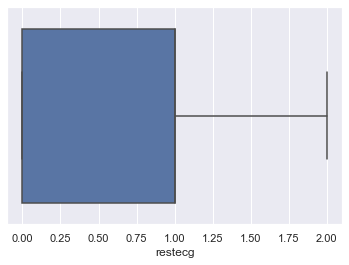

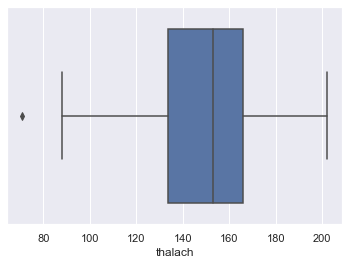

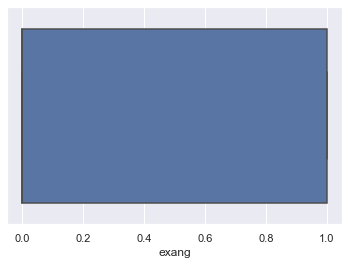

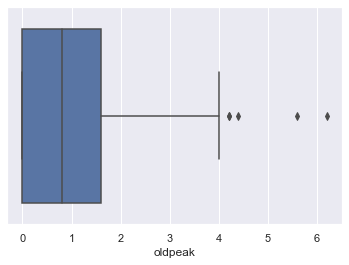

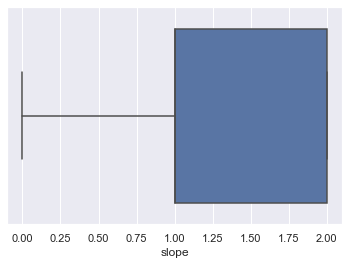

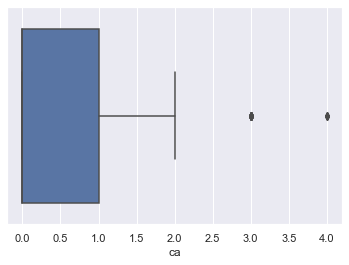

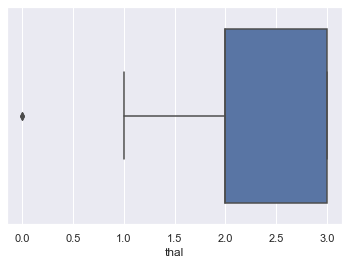

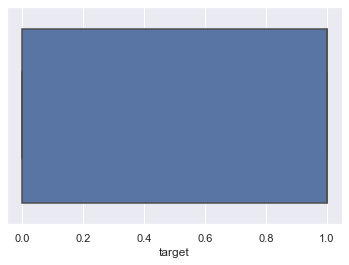

In [9]:
for i in data.columns:
    sns.boxplot(data[i],orient="h")
    plt.show()

In [10]:
col=['trestbps', 'chol','thalach','oldpeak','thal']
for i in col:
    descr=data[i].describe()
    IQR=descr["75%"]-descr["25%"]
    upper=descr["75%"]+1.5*IQR
    lower=descr["25%"]-1.5*IQR
    data[i][data[i]>upper]=upper
    data[i][data[i]<lower]=lower

### CORRELATION MATRIX

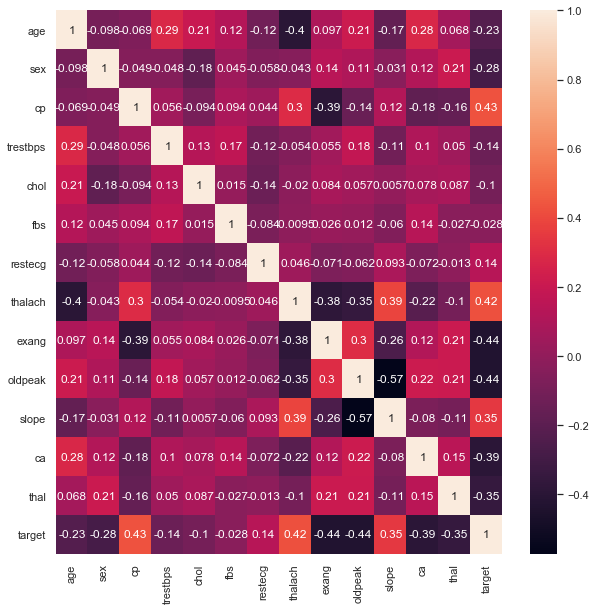

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

### HISTOGRAM

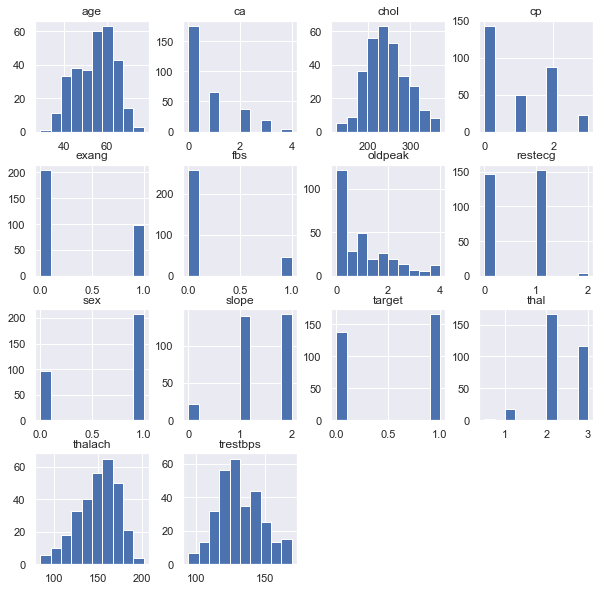

In [12]:
data.hist(figsize=(10,10))
plt.show()

### BAR PLOT OF TARGET

Text(0, 0.5, 'count')

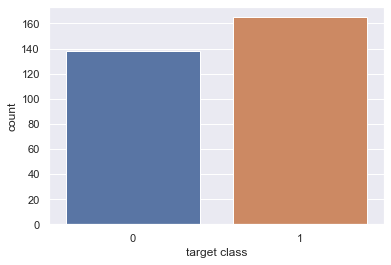

In [13]:
data["target"].value_counts()
sns.barplot(data["target"].value_counts().index,data["target"].value_counts())
plt.xlabel("target class")
plt.ylabel("count")

### PAIRPLOT

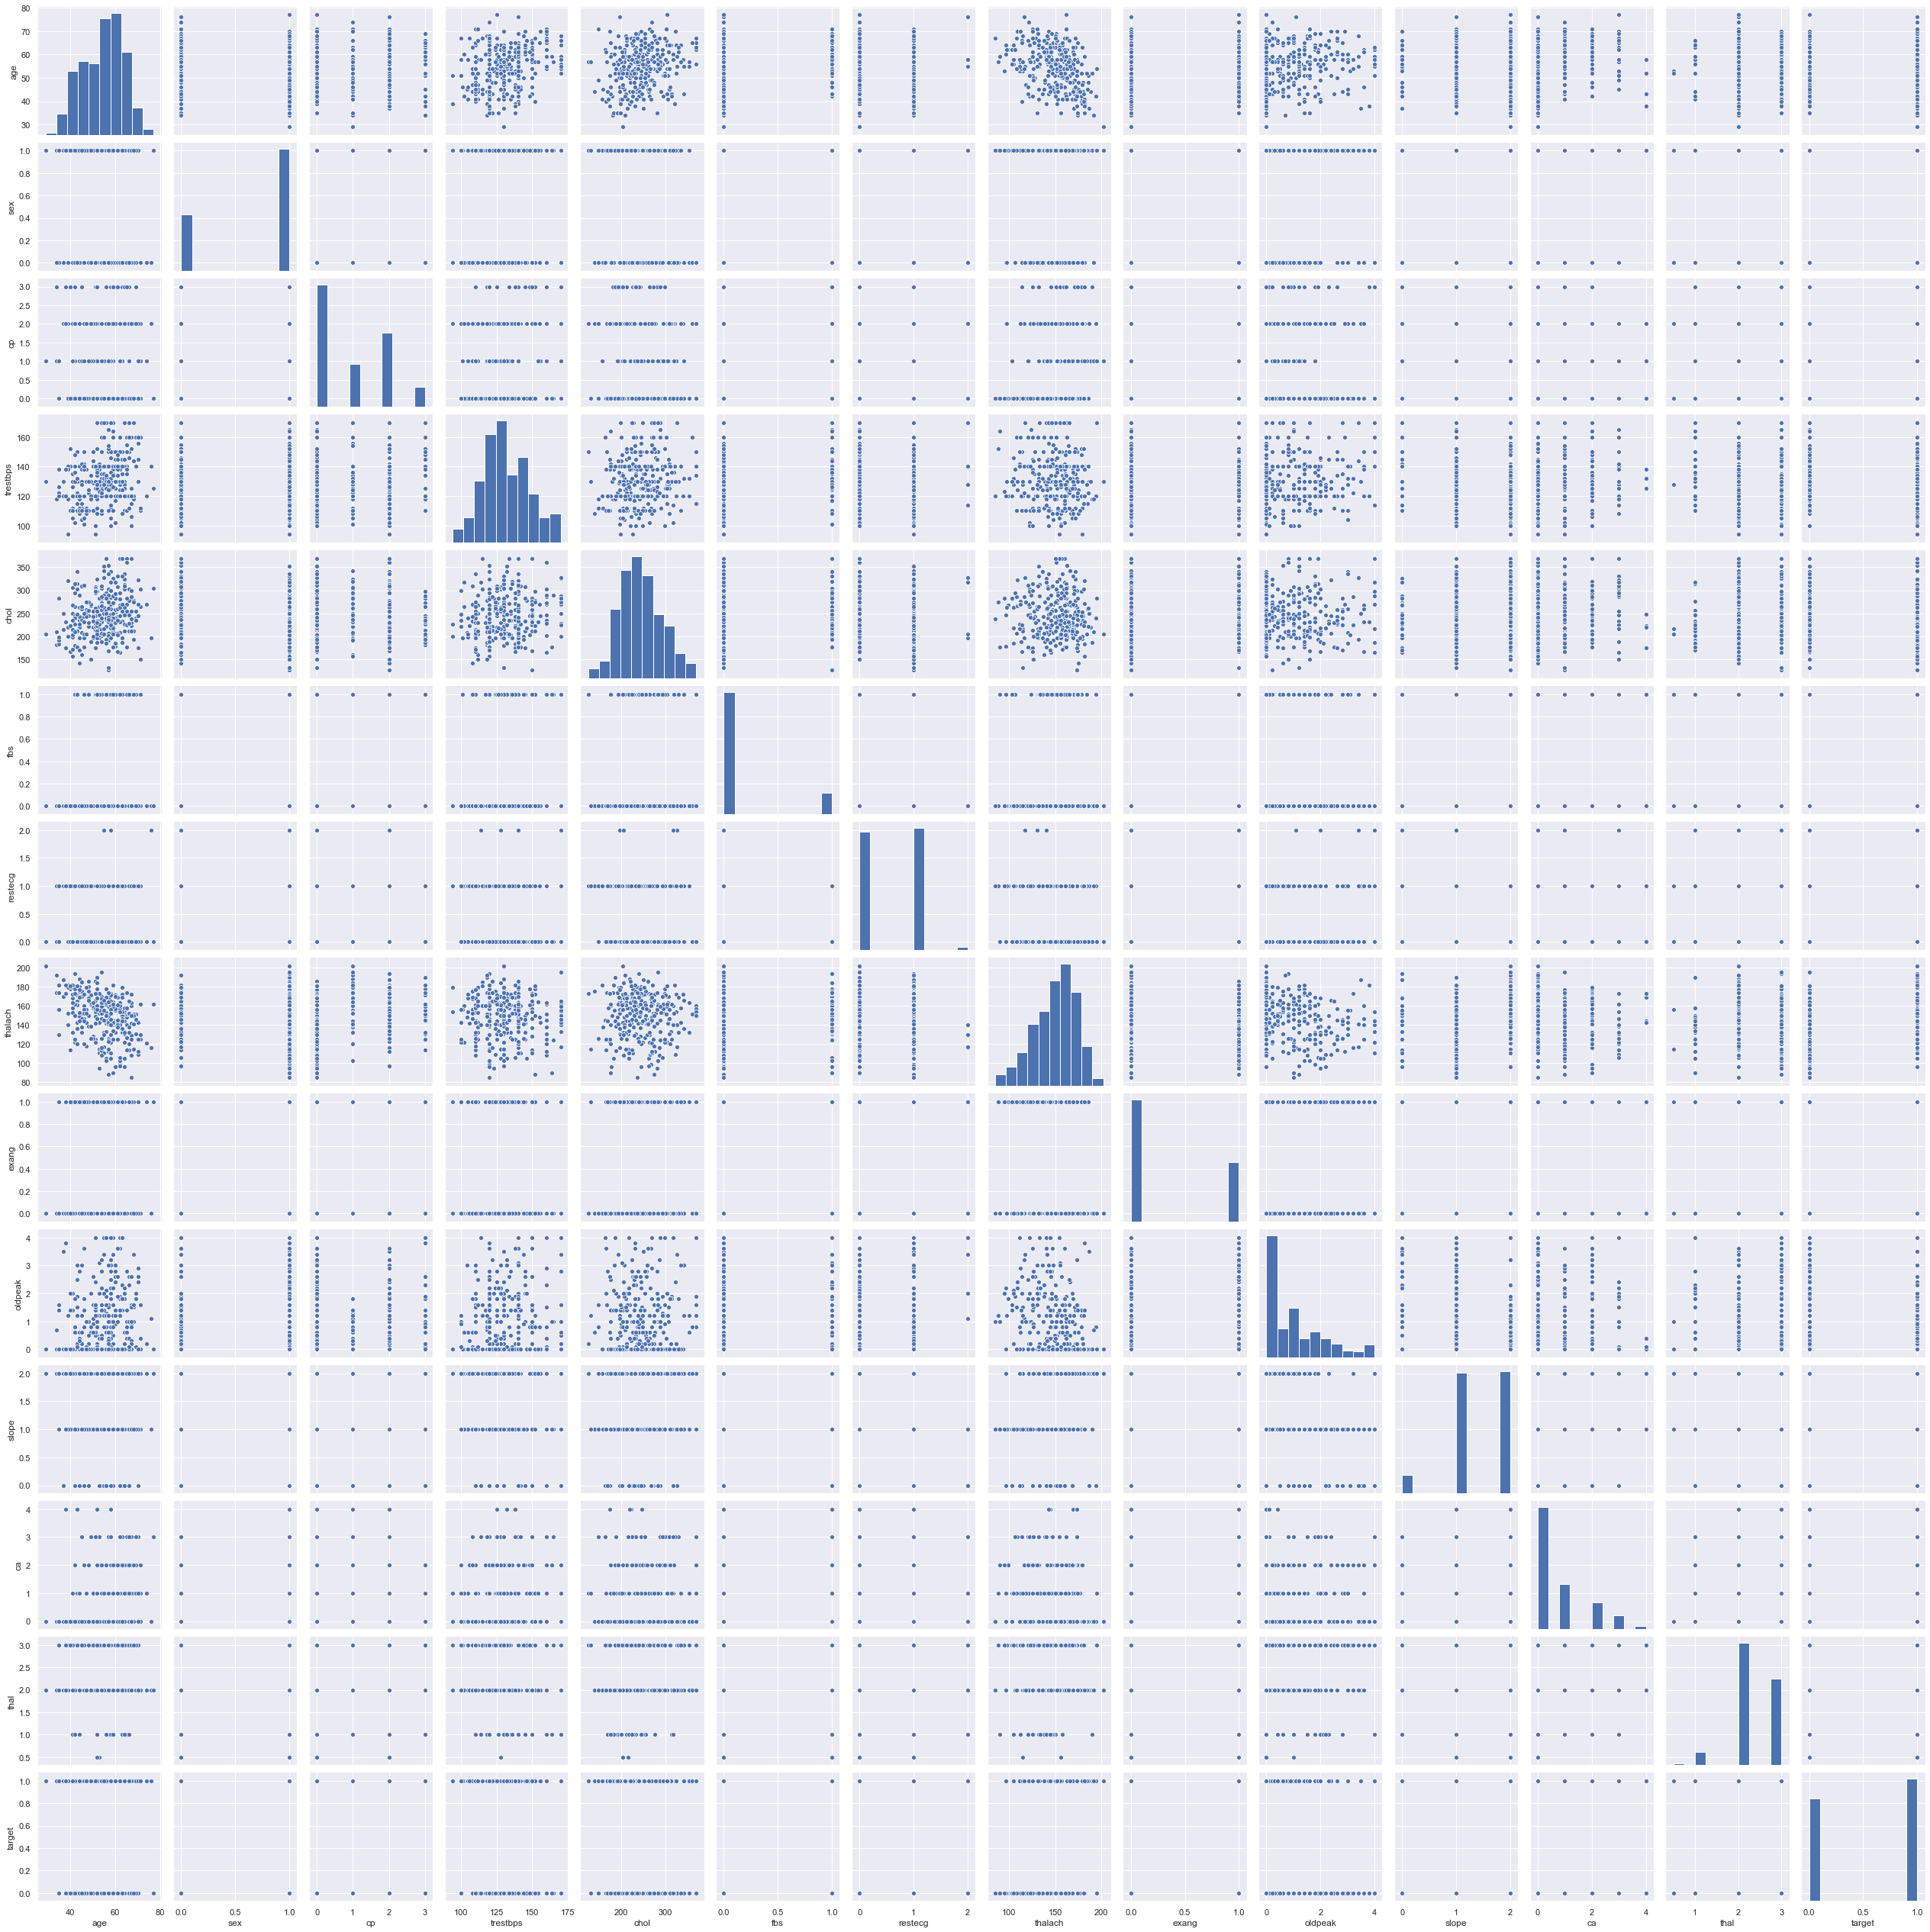

In [14]:
sns.pairplot(data)

### X & Y 

In [15]:
x=data.drop("target",axis=1)
y=data["target"]

In [16]:
x.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal        float64
dtype: object

In [17]:
# x=pd.get_dummies(x)
x = pd.get_dummies(x, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

### STANDARD SCALER

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# xscaled=scaler.fit_transform(x)

columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
x[columns_to_scale] = scaler.fit_transform(x[columns_to_scale])

### TRAIN TEST SPLIT

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=0)

### LOGISTIC REGRESSION

In [20]:
from sklearn.linear_model import LogisticRegression
model_logistic=LogisticRegression()
model_logistic.fit(xtrain,ytrain)
ypred_log=model_logistic.predict(xtest)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
logistic_score=accuracy_score(ytest,ypred_log)
logistic_score

0.8852459016393442

### LOGISTIC HYPERPARAMETERS

In [23]:
from sklearn.model_selection import GridSearchCV
model_logistic=LogisticRegression()
solver=['liblinear', 'newton-cg', 'sag', 'saga','lbfgs']
penalty=['l1','l2', 'elasticnet', 'none']
parameter={"solver":solver,"penalty":penalty}
logistic_class=GridSearchCV(model_logistic,parameter)
logistic_class.fit(xtrain,ytrain)
logistic_class.best_params_



{'penalty': 'l2', 'solver': 'liblinear'}

In [24]:
logistic_class=LogisticRegression(penalty='l2', solver='lbfgs')
logistic_class.fit(xtrain,ytrain)
ypred_log_hy=logistic_class.predict(xtest)

In [25]:
logistic_score=accuracy_score(ytest,ypred_log_hy)
logistic_score

0.8852459016393442

In [26]:
# import joblib
# joblib.dump(model_logistic,"data\heart_log_pkl.pkl")

In [27]:
import pickle
pickle_out = open("heartlog.pkl","wb")
pickle.dump(model_logistic, pickle_out)
pickle_out.close()



### RIDGE CLASSIFIER

In [28]:
from sklearn.linear_model import RidgeClassifier
solver=["auto","svd"]
ridge=RidgeClassifier()
parameters={"alpha":[1e-15,1e-10,1e-5,1e-3,1,3,2,4,5,6,10,30,50,70,100],"solver":solver}
ridge_class=GridSearchCV(ridge,parameters)
ridge_class.fit(xtrain,ytrain)
ridge_class.best_params_

{'alpha': 30, 'solver': 'auto'}

In [29]:
ridge_class=RidgeClassifier(alpha = 4,solver='auto')
ridge_class.fit(xtrain,ytrain)
ypred_ridge=ridge_class.predict(xtest)

In [30]:
ridge_score=accuracy_score(ytest,ypred_ridge)
ridge_score

0.8852459016393442

### ELASTIC NET

In [31]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
parameters={"alpha":[1e-15,1e-10,1e-5,1e-4,1e-3,1e-2,1e-1,1,3,2,4,5,6,10,30,50,70,100]}
elastic_class=GridSearchCV(elastic,parameters)
elastic_class.fit(xtrain,ytrain)
elastic_class.best_params_

{'alpha': 0.01}

In [32]:
elastic_class=RidgeClassifier(alpha = 0.01)
elastic_class.fit(xtrain,ytrain)
ypred_elastic=ridge_class.predict(xtest)

In [33]:
elastic_score=accuracy_score(ytest,ypred_elastic)
elastic_score

0.8852459016393442

### DECISION TREE

In [34]:
from sklearn.tree import DecisionTreeClassifier
model_tree=DecisionTreeClassifier(random_state=50)
model_tree.fit(xtrain,ytrain)
ypred=model_tree.predict(xtest)

In [35]:
tree_score=accuracy_score(ytest,ypred)
tree_score

0.8032786885245902

### TREE MODEL

In [36]:
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

In [37]:
features = list(x.columns)

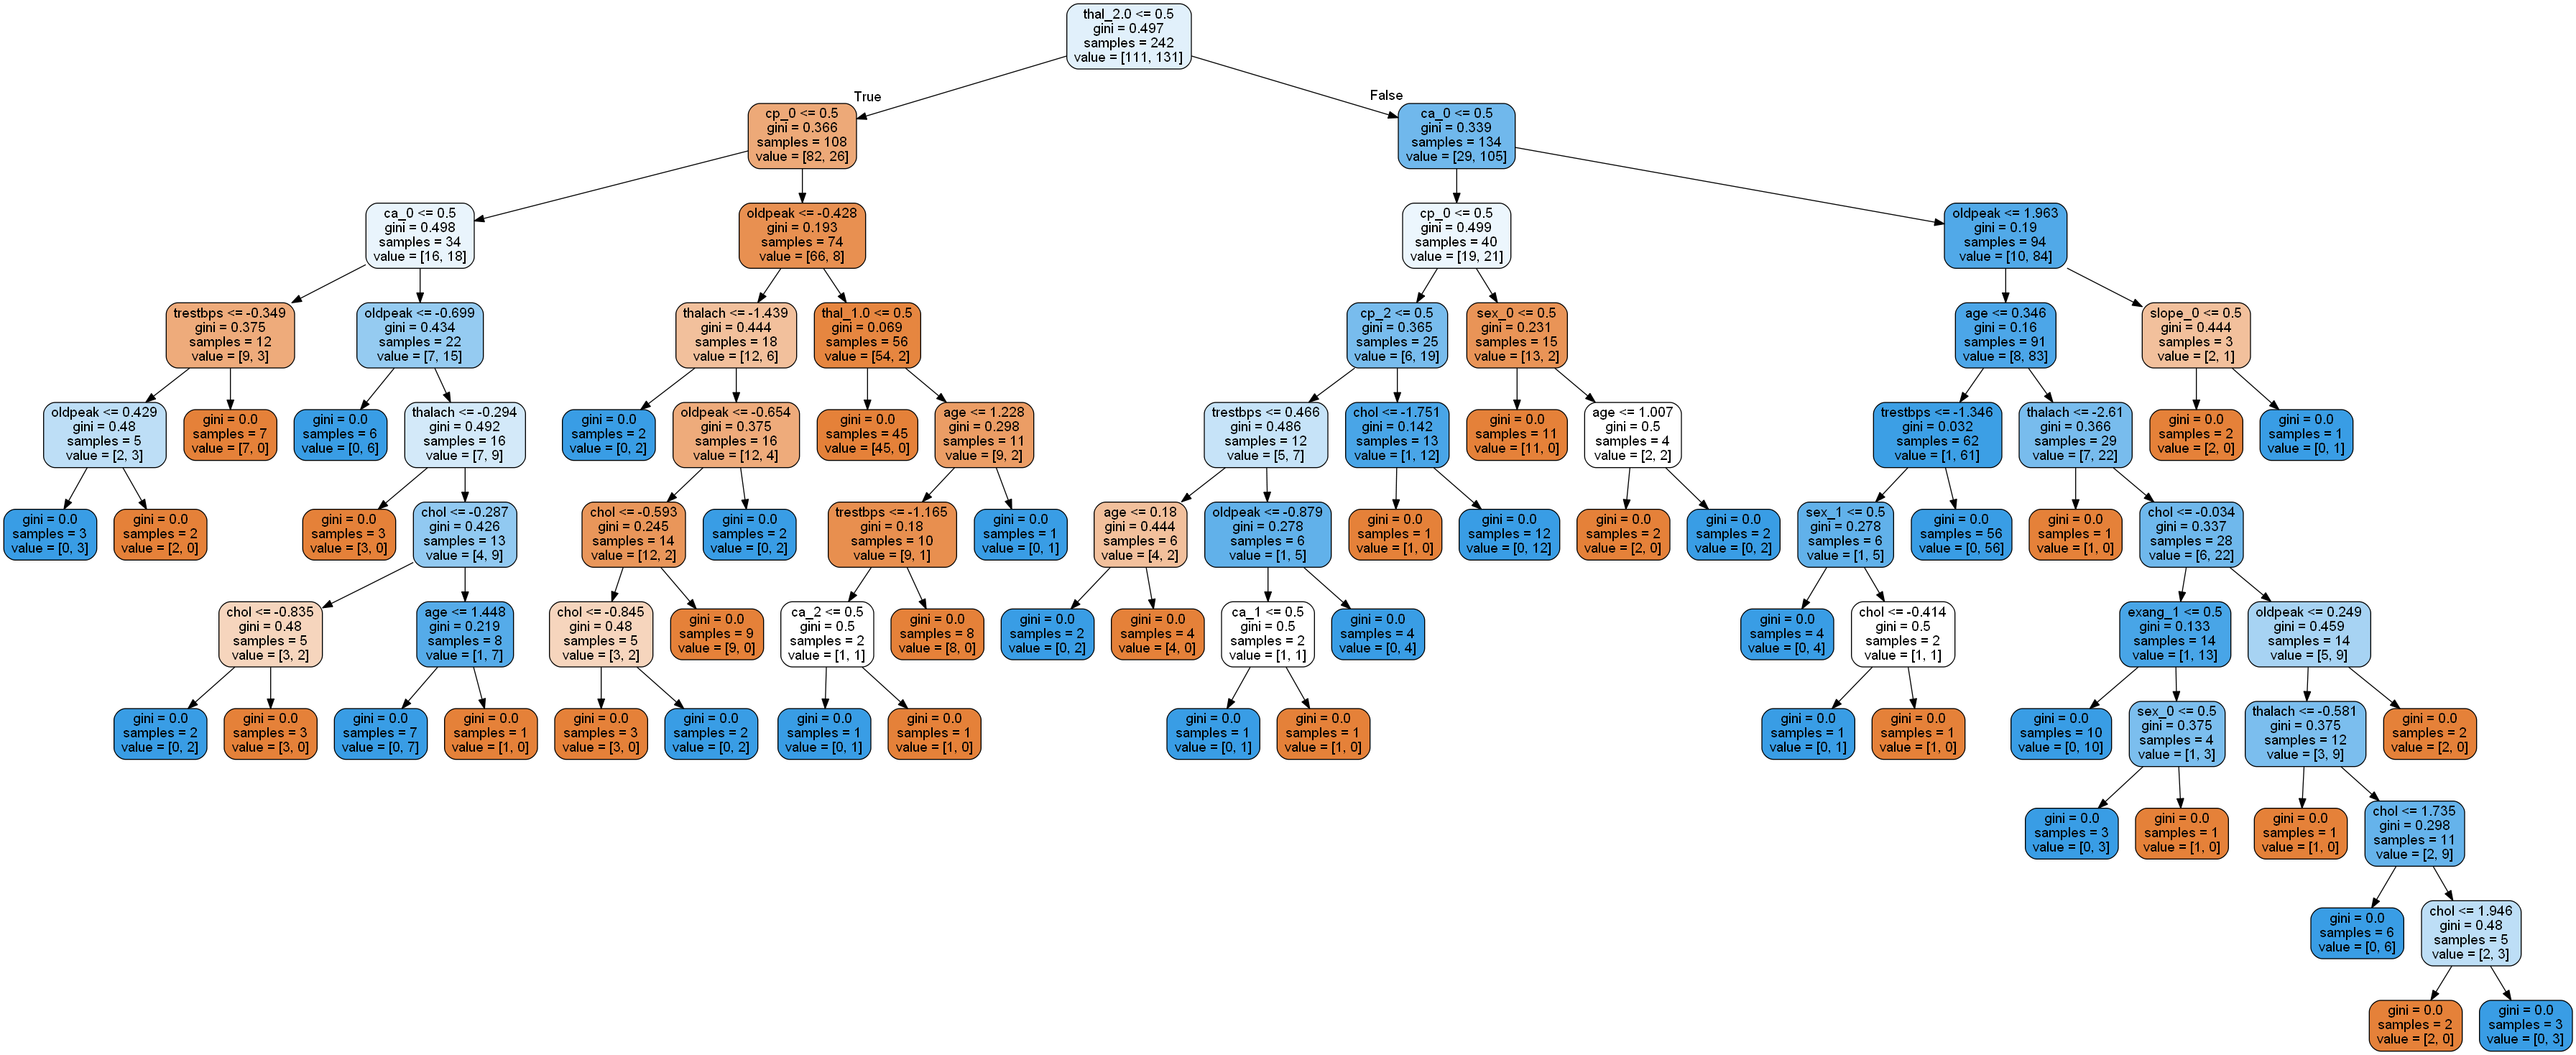

In [38]:
dot_data = StringIO()  
export_graphviz(model_tree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### RANDOM FOREST 

In [39]:
from sklearn.ensemble import RandomForestClassifier
model_forest=RandomForestClassifier(random_state=0)
model_forest.fit(xtrain,ytrain)
ypred=model_forest.predict(xtest)

In [40]:
# import pickle
# pickle_out = open("heartRad.pkl","wb")
# pickle.dump(model_forest, pickle_out)
# pickle_out.close()

In [41]:
forest_score=accuracy_score(ytest,ypred)
forest_score

0.8688524590163934

### RANDOM FOREST HYPER PARAMETER

In [42]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
n_estimators=[25,30,50,75,100]
criterion=["entropy","gini"]
max_depth=[3,5,7,10]
parameters={"n_estimators":n_estimators,"criterion":criterion,"max_depth":max_depth}
model_class=GridSearchCV(model,parameters)
model_class.fit(xtrain,ytrain)
model_class.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 25}

In [43]:
model_class=RandomForestClassifier(criterion= 'gini', max_depth=5, n_estimators=30)
model_class.fit(xtrain,ytrain)
ypred_rad_hyper=model_class.predict(xtest)

In [44]:
forest_hyper_score=accuracy_score(ytest,ypred_rad_hyper)
forest_score

0.8688524590163934

### XGBOOST

In [45]:
import xgboost as xbg
model_xgboost=xbg.XGBClassifier()
model_xgboost.fit(xtrain,ytrain)
ypred=model_xgboost.predict(xtest)

In [46]:
xgboost_score=accuracy_score(ytest,ypred)
xgboost_score

0.8360655737704918

### XGBOOST HYPERPARAMS

In [47]:
parameters={'objective':['binary:logistic'],'colsample_bytree':[0.3],'learning_rate':[0.1],
           'max_depth':[3,5],'alpha':[10],'n_estimators':[10,50,100]}
xgb_class=GridSearchCV(model_xgboost,parameters)
xgb_class.fit(xtrain,ytrain)
xgb_class.best_params_

{'alpha': 10,
 'colsample_bytree': 0.3,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 10,
 'objective': 'binary:logistic'}

In [48]:
xgb_class=xbg.XGBClassifier(alpha=10,
 colsample_bytree=0.3,
 learning_rate=0.1,
 max_depth=5,
 n_estimators=10,
 objective='binary:logistic')
xgb_class.fit(xtrain,ytrain)
ypred_xg_hyper=xgb_class.predict(xtest)

In [49]:
xgboost_hyper_score=accuracy_score(ytest,ypred_xg_hyper)
xgboost_score

0.8360655737704918

### SVM 

In [50]:
from sklearn.svm import SVC
model_svm=SVC()
model_svm.fit(xtrain,ytrain)
ypred_svm=model_svm.predict(xtest)

In [51]:
svm_score=accuracy_score(ytest,ypred_svm)
svm_score

0.8360655737704918

### SVM HYPER PARAMETERS

In [52]:
parameters={"C":[0.001,.01,.1,10],"gamma":[.1,.01,"auto"],"kernel":["rbf","linear"]}
svm_class=GridSearchCV(model_svm,parameters)
svm_class.fit(xtrain,ytrain)
svm_class.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [53]:
svm_class=SVC(C=0.1, gamma= 0.1, kernel= 'linear')
svm_class.fit(xtrain,ytrain)
ypred_svm_hyper=svm_class.predict(xtest)

In [54]:
svm_hyper_score=accuracy_score(ytest,ypred_svm)
svm_hyper_score

0.8360655737704918

### K NEIGHBORS

In [55]:
from sklearn.neighbors import KNeighborsClassifier
a=[]
for i in range(1,len(data.columns)):
    model_neignbors=KNeighborsClassifier(n_neighbors=i)
    model_neignbors.fit(xtrain,ytrain)
    ypred=model_neignbors.predict(xtest)
    a.append(model_neignbors.score(xtest,ytest).round(2))


In [56]:
a

[0.79, 0.8, 0.82, 0.82, 0.8, 0.82, 0.84, 0.87, 0.84, 0.87, 0.85, 0.85, 0.85]

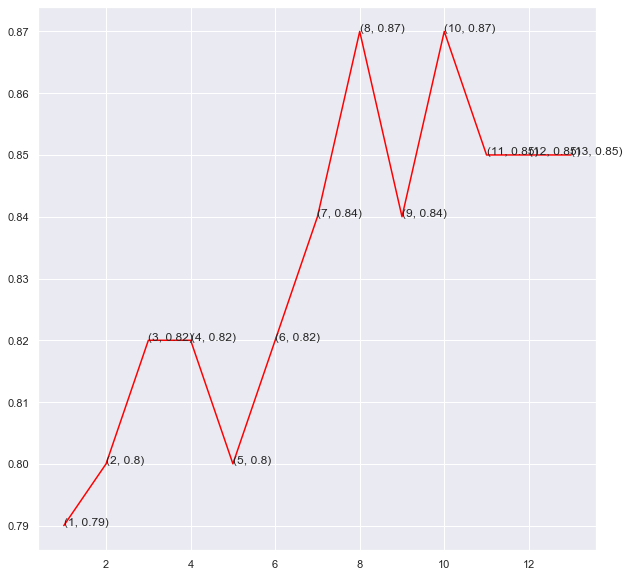

In [57]:
b=[x for x in range(1,len(data.columns))]
ds=pd.Series(data=a,index=b).sort_values(ascending=False)
plt.figure(figsize=(10,10))
plt.plot(b, a, color = 'red')
for i in range(len(a)):
    plt.text(b[i],a[i],(b[i],a[i]))


In [58]:
model_neignbors=KNeighborsClassifier(n_neighbors=8)
model_neignbors.fit(xtrain,ytrain)
ypred_KN=model_neignbors.predict(xtest)

In [59]:
kn_score=accuracy_score(ytest,ypred_KN)
kn_score

0.8688524590163934

#### SCORES

In [60]:
ds_score=pd.Series(data=[logistic_score,ridge_score,elastic_score,
                        tree_score,forest_score,xgboost_score,
                         svm_score,kn_score],
                  index=["logistic_score","ridge_score","elastic_score",
                        "tree_score","forest_score","xgboost_score",
                         "svm_score","kn_score"]).sort_values(ascending=False)

In [61]:
ds_score=ds_score
ds_score*100

elastic_score     88.524590
ridge_score       88.524590
logistic_score    88.524590
kn_score          86.885246
forest_score      86.885246
svm_score         83.606557
xgboost_score     83.606557
tree_score        80.327869
dtype: float64

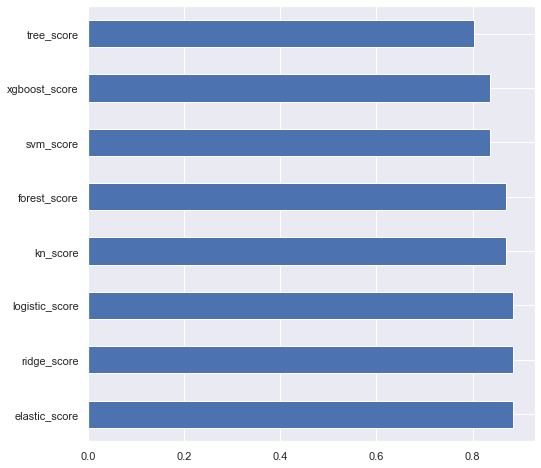

In [62]:
plt.figure(figsize=(8,8))
ds_score.plot(kind="barh")

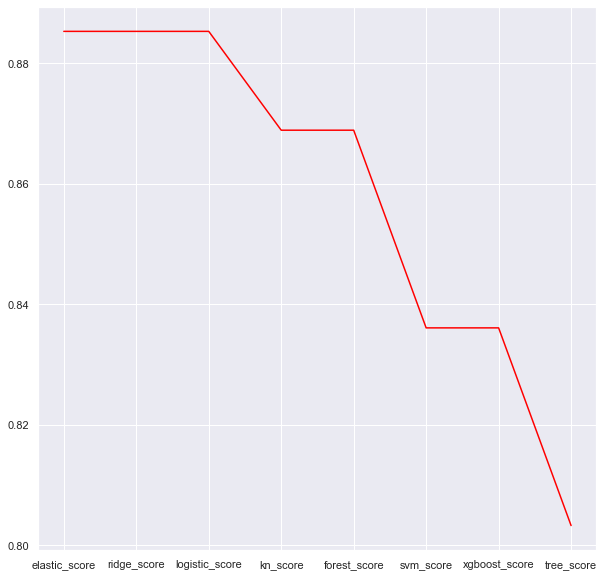

In [63]:
plt.figure(figsize=(10,10))
plt.plot(ds_score.index, ds_score, color = 'red')